---
title: Of Data and Trees
draft: true
date: "10/03/2025"
format: 
    html:
        code-fold: true
---

In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('../src')

from utils.paths import guppd_path, lcz_dir
from utils.constants import lcz_dict
from gee_helpers import authenticate_ee
from city import City
from classifiers.pixel_classifier import PixelClassifier
from embeddings.geotessera import GeoTesseraEmbeddings
from embeddings.alpha_earth import AlphaEarthEmbeddings
from lcz.demuzere import Demuzere
from lcz.geoclimate import Geoclimate
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

In [2]:
guppd_gdf = gpd.read_file(guppd_path, layer="urbanspatial_guppd_v1_polygons")
guppd_gdf.sort_values(by="GHSPOP_R23_2025", inplace=True)
# guppd_gdf = guppd_gdf[guppd_gdf["GHSPOP_R23_2025"] > 1e6]
guppd_gdf.reset_index(drop=True, inplace=True)

In [3]:
city_example_gdf = guppd_gdf[(guppd_gdf["ISO"] == "GBR") & (guppd_gdf["JRC_NAME_MAIN"] == "Cambridge")]
city_example = City(
    city=city_example_gdf["JRC_NAME_MAIN"].values[0],
    smod_id=city_example_gdf["SMOD_ID"].values[0],
    country_code=city_example_gdf["ISO"].values[0],
    bbox=city_example_gdf.total_bounds.tolist(), # minx, miny, maxx, maxy
)
city_example

City(city='Cambridge', smod_id='30_4732', country_code='GBR', bbox=[0.08131345500004272, 52.17205629800003, 0.18967890600004012, 52.249807786000076], climate_type='Cfb', utm_crs='EPSG:32631', utm_bbox=[300421.00688341603, 5784191.7236782815, 308164.895357511, 5792544.390988352])

In [4]:
year = 2024
ae_2024 = AlphaEarthEmbeddings(city=city_example, year=year)
# authenticate_ee()
ae_embeddings_2024_da = ae_2024.get_embeddings()
ae_embeddings_2024_da

2025-09-19 13:42:38.365 | INFO     | embeddings.base:get_embeddings:46 - Loading cached 'AlphaEarth' embeddings from /maps/acz25/phd-thesis-data/input/Google/AlphaEarth/2024/GBR/30_4732_Cambridge_ae.zarr
2025-09-19 13:42:38.730 | INFO     | embeddings.base:get_embeddings:53 - Chunking 'AlphaEarth' embeddings


<xarray.DataArray (band: 64, y: 835, x: 774)> Size: 165MB
dask.array<rechunk-merge, shape=(64, 835, 774), dtype=float32, chunksize=(64, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 7kB 5.784e+06 5.784e+06 ... 5.793e+06 5.793e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.081e+05 3.082e+05
  * band     (band) object 512B 'A36' 'A04' 'A41' 'A60' ... 'A15' 'A34' 'A49'
Attributes:
    crs:      EPSG:32631

In [5]:
gt_2024 = GeoTesseraEmbeddings(city=city_example, year=year)
gt_embeddings_2024_da = gt_2024.get_embeddings()
gt_embeddings_2024_da

2025-09-19 13:42:38.809 | INFO     | embeddings.base:get_embeddings:46 - Loading cached 'GeoTessera' embeddings from /maps/acz25/phd-thesis-data/input/GEOTESSERA/clipped/2024/GBR/30_4732_Cambridge.zarr
2025-09-19 13:42:38.895 | INFO     | embeddings.base:get_embeddings:53 - Chunking 'GeoTessera' embeddings


<xarray.DataArray (band: 128, y: 836, x: 775)> Size: 332MB
dask.array<rechunk-merge, shape=(128, 836, 775), dtype=float32, chunksize=(128, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 6kB 3.004e+05 3.004e+05 ... 3.082e+05 3.082e+05
    spatial_ref  int64 8B ...
  * y            (y) float64 7kB 5.793e+06 5.793e+06 ... 5.784e+06 5.784e+06
  * band         (band) object 1kB 'A049' 'A034' 'A043' ... 'A073' 'A097' 'A103'
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
year = 2018
ae_2018 = AlphaEarthEmbeddings(city=city_example, year=year)
# authenticate_ee()
ae_embeddings_2018_da = ae_2018.get_embeddings()
ae_embeddings_2018_da

2025-09-19 13:42:38.956 | INFO     | embeddings.base:get_embeddings:46 - Loading cached 'AlphaEarth' embeddings from /maps/acz25/phd-thesis-data/input/Google/AlphaEarth/2018/GBR/30_4732_Cambridge_ae.zarr
2025-09-19 13:42:39.367 | INFO     | embeddings.base:get_embeddings:53 - Chunking 'AlphaEarth' embeddings


<xarray.DataArray (band: 64, y: 835, x: 774)> Size: 165MB
dask.array<rechunk-merge, shape=(64, 835, 774), dtype=float32, chunksize=(64, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 7kB 5.784e+06 5.784e+06 ... 5.793e+06 5.793e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.081e+05 3.082e+05
  * band     (band) object 512B 'A22' 'A46' 'A55' 'A04' ... 'A18' 'A12' 'A20'
Attributes:
    crs:      EPSG:32631

In [7]:
gt_2018 = GeoTesseraEmbeddings(city=city_example, year=year)
gt_embeddings_2018_da = gt_2018.get_embeddings()
gt_embeddings_2018_da

2025-09-19 13:42:39.438 | INFO     | embeddings.base:get_embeddings:46 - Loading cached 'GeoTessera' embeddings from /maps/acz25/phd-thesis-data/input/GEOTESSERA/clipped/2018/GBR/30_4732_Cambridge.zarr
2025-09-19 13:42:39.525 | INFO     | embeddings.base:get_embeddings:53 - Chunking 'GeoTessera' embeddings


<xarray.DataArray (band: 128, y: 836, x: 775)> Size: 332MB
dask.array<rechunk-merge, shape=(128, 836, 775), dtype=float32, chunksize=(128, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 6kB 3.004e+05 3.004e+05 ... 3.082e+05 3.082e+05
    spatial_ref  int64 8B ...
  * y            (y) float64 7kB 5.793e+06 5.793e+06 ... 5.784e+06 5.784e+06
  * band         (band) object 1kB 'A066' 'A088' 'A011' ... 'A080' 'A021' 'A126'
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [8]:
gc = Geoclimate(workflow="OSM", city=city_example)
gc_lcz_da = gc.get_lcz()
gc_lcz_da

2025-09-19 13:42:39.587 | INFO     | lcz.base:get_lcz:36 - Loading cached 'Geoclimate' LCZ from /maps/acz25/phd-thesis-data/output/lcz_classification/geoclimate/GBR/30_4732_Cambridge/30_4732_Cambridge_geoclimate.zarr
2025-09-19 13:42:39.603 | INFO     | lcz.base:get_lcz:43 - Chunking 'Geoclimate' LCZ


<xarray.DataArray (band: 3, y: 900, x: 780)> Size: 8MB
dask.array<rechunk-merge, shape=(3, 900, 780), dtype=float32, chunksize=(3, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 7kB 5.793e+06 5.793e+06 ... 5.784e+06 5.784e+06
  * x            (x) float64 6kB 3.004e+05 3.004e+05 ... 3.082e+05 3.082e+05
    spatial_ref  int64 8B ...
  * band         (band) object 24B 'SVF' 'ASPECT_RATIO' 'LCZ_PRIMARY'

In [9]:
dz = Demuzere(city=city_example)
# authenticate_ee()
dz_lcz_da = dz.get_lcz()
dz_lcz_da

2025-09-19 13:42:39.656 | INFO     | lcz.base:get_lcz:36 - Loading cached 'Demuzere' LCZ from /maps/acz25/phd-thesis-data/input/LCZ/GBR/30_4732_Cambridge_demuzere.zarr
2025-09-19 13:42:39.668 | INFO     | lcz.base:get_lcz:43 - Chunking 'Demuzere' LCZ


<xarray.DataArray (band: 3, y: 835, x: 774)> Size: 8MB
dask.array<rechunk-merge, shape=(3, 835, 774), dtype=float32, chunksize=(3, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 7kB 5.784e+06 5.784e+06 ... 5.793e+06 5.793e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.081e+05 3.082e+05
  * band     (band) object 24B 'LCZ_Probability' 'LCZ' 'LCZ_Filter'
Attributes:
    max_mirrored_version:  1696930913272071
    crs:                   EPSG:32631

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
# Built vs Natural
new_class_dict = {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 
                  6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 
                  11: 2, 12: 2, 13: 2, 14: 2, 
                  15: 2, 16: 2, 17: 2}
# Urban vs Rural vs Natural
new_class_dict = {1: 1, 2: 1, 3: 1, 4: 3, 5: 3, 
                  6: 3, 7: 3, 8: 1, 9: 3, 10: 1, 
                  11: 2, 12: 2, 13: 2, 14: 2, 
                  15: 2, 16: 2, 17: 2}
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=411)

## Demuzere
### AlphaEarth

In [11]:
%time
ae_dz_classifier = PixelClassifier()
X, y, coords, labels_da = ae_dz_classifier.prepare_data(dz_lcz_da, ae_embeddings_2018_da, "LCZ_Filter", 2000)
ae_dz_classifier._classifier = rf_classifier
ae_dz_classifier.train()

2025-09-19 13:42:39.895 | INFO     | classifiers.pixel_classifier:prepare_data:103 - Preparing data for band LCZ_Filter
2025-09-19 13:42:40.076 | INFO     | classifiers.pixel_classifier:_sample_classes:26 - Sampling classes for band LCZ_Filter


CPU times: user 3 Œºs, sys: 2 Œºs, total: 5 Œºs
Wall time: 11.4 Œºs


2025-09-19 13:42:40.139 | INFO     | classifiers.pixel_classifier:_extract_embeddings:55 - Extracting embeddings for 20250 coordinates
2025-09-19 13:42:57.288 | INFO     | classifiers.pixel_classifier:train:141 - ‚úÖ Model training complete.


RandomForestClassifier(random_state=411)

2025-09-19 13:42:57.355 | INFO     | classifiers.pixel_classifier:evaluate:149 - 
--- üìä Classification Report ---


              precision    recall  f1-score   support

           2       0.85      0.92      0.89       600
           3       0.97      0.95      0.96       129
           4       0.73      0.77      0.75       600
           5       0.72      0.64      0.68       600
           6       0.71      0.69      0.70       600
           8       0.75      0.61      0.67       600
           9       0.78      0.92      0.84       600
          11       0.90      0.92      0.91       600
          12       0.72      0.71      0.71       600
          14       0.91      0.87      0.89       600
          17       0.95      0.98      0.97       546

    accuracy                           0.81      6075
   macro avg       0.82      0.82      0.81      6075
weighted avg       0.80      0.81      0.80      6075



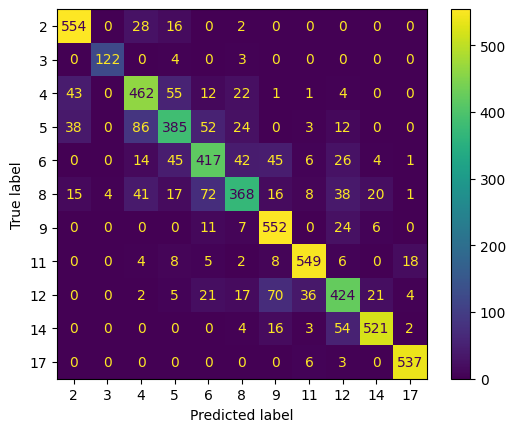

In [12]:
y_ae_dz_test_pred = ae_dz_classifier.evaluate()
ConfusionMatrixDisplay.from_estimator(ae_dz_classifier._classifier, ae_dz_classifier._X_test, ae_dz_classifier._y_test)

In [13]:
ae_dz_pred_roi_da = ae_dz_classifier.classify_roi(ae_embeddings_2018_da)
ae_dz_pred_roi_da

2025-09-19 13:42:57.927 | INFO     | classifiers.pixel_classifier:classify_roi:158 - Classifying entire ROI


<xarray.DataArray 'predicted_class' (y: 835, x: 774)> Size: 5MB
array([[14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       ...,
       [14, 12, 12, ..., 14, 14, 14],
       [12, 12, 12, ..., 14, 14, 14],
       [14, 12, 12, ..., 14, 14, 14]], shape=(835, 774))
Coordinates:
  * y        (y) float64 7kB 5.784e+06 5.784e+06 ... 5.793e+06 5.793e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.081e+05 3.082e+05

### GeoTessera

In [14]:
%time
gt_dz_classifier = PixelClassifier()
X, y, coords, labels_da = gt_dz_classifier.prepare_data(dz_lcz_da, gt_embeddings_2018_da, "LCZ_Filter", 2000)
gt_dz_classifier._classifier = rf_classifier
gt_dz_classifier.train()

2025-09-19 13:44:45.130 | INFO     | classifiers.pixel_classifier:prepare_data:103 - Preparing data for band LCZ_Filter
2025-09-19 13:44:45.215 | INFO     | classifiers.pixel_classifier:_sample_classes:26 - Sampling classes for band LCZ_Filter
2025-09-19 13:44:45.276 | INFO     | classifiers.pixel_classifier:_extract_embeddings:55 - Extracting embeddings for 20250 coordinates


CPU times: user 0 ns, sys: 12 Œºs, total: 12 Œºs
Wall time: 27.2 Œºs


2025-09-19 13:45:16.710 | INFO     | classifiers.pixel_classifier:train:141 - ‚úÖ Model training complete.


RandomForestClassifier(random_state=411)

2025-09-19 13:45:16.771 | INFO     | classifiers.pixel_classifier:evaluate:149 - 
--- üìä Classification Report ---


              precision    recall  f1-score   support

           2       0.62      0.75      0.68       600
           3       0.84      0.33      0.47       129
           4       0.49      0.42      0.45       600
           5       0.42      0.40      0.41       600
           6       0.42      0.51      0.46       600
           8       0.53      0.40      0.46       600
           9       0.53      0.55      0.54       600
          11       0.62      0.73      0.67       600
          12       0.54      0.58      0.56       600
          14       0.87      0.77      0.82       600
          17       0.90      0.90      0.90       546

    accuracy                           0.59      6075
   macro avg       0.62      0.57      0.58      6075
weighted avg       0.60      0.59      0.59      6075



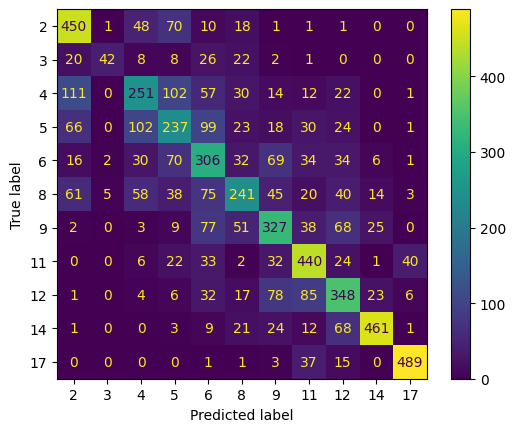

In [15]:
y_gt_dz_test_pred = gt_dz_classifier.evaluate()
ConfusionMatrixDisplay.from_estimator(gt_dz_classifier._classifier, gt_dz_classifier._X_test, gt_dz_classifier._y_test)

In [16]:
gt_dz_pred_roi_da = gt_dz_classifier.classify_roi(gt_embeddings_2018_da)
gt_dz_pred_roi_da

2025-09-19 13:45:17.362 | INFO     | classifiers.pixel_classifier:classify_roi:158 - Classifying entire ROI


<xarray.DataArray 'predicted_class' (y: 836, x: 775)> Size: 5MB
array([[12, 12, 12, ..., 14, 14, 14],
       [12, 12, 12, ..., 12, 14, 12],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [12, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], shape=(836, 775))
Coordinates:
  * y        (y) float64 7kB 5.793e+06 5.793e+06 ... 5.784e+06 5.784e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.082e+05 3.082e+05

## Geoclimate
### AlphaEarth

In [17]:
%time
ae_gc_classifier = PixelClassifier()
X, y, coords, labels_da = ae_gc_classifier.prepare_data(gc_lcz_da, ae_embeddings_2024_da, "LCZ_PRIMARY", 2000)
ae_gc_classifier._classifier = rf_classifier
ae_gc_classifier.train()

2025-09-19 13:57:19.761 | INFO     | classifiers.pixel_classifier:prepare_data:103 - Preparing data for band LCZ_PRIMARY
2025-09-19 13:57:19.862 | INFO     | classifiers.pixel_classifier:_sample_classes:26 - Sampling classes for band LCZ_PRIMARY
2025-09-19 13:57:19.924 | INFO     | classifiers.pixel_classifier:_extract_embeddings:55 - Extracting embeddings for 20110 coordinates


CPU times: user 1e+03 ns, sys: 12 Œºs, total: 13 Œºs
Wall time: 27.7 Œºs


2025-09-19 13:57:36.202 | INFO     | classifiers.pixel_classifier:train:141 - ‚úÖ Model training complete.


RandomForestClassifier(random_state=411)

2025-09-19 13:57:36.257 | INFO     | classifiers.pixel_classifier:evaluate:149 - 
--- üìä Classification Report ---


              precision    recall  f1-score   support

           2       0.73      0.87      0.79       600
           4       0.91      0.97      0.94        33
           5       0.74      0.72      0.73       600
           6       0.49      0.41      0.45       600
           8       0.65      0.73      0.69       600
           9       0.50      0.52      0.51       600
          11       0.70      0.82      0.76       600
          12       0.73      0.76      0.74       600
          14       0.84      0.68      0.75       600
          15       0.58      0.46      0.51       600
          17       0.95      0.95      0.95       600

    accuracy                           0.69      6033
   macro avg       0.71      0.72      0.71      6033
weighted avg       0.69      0.69      0.69      6033



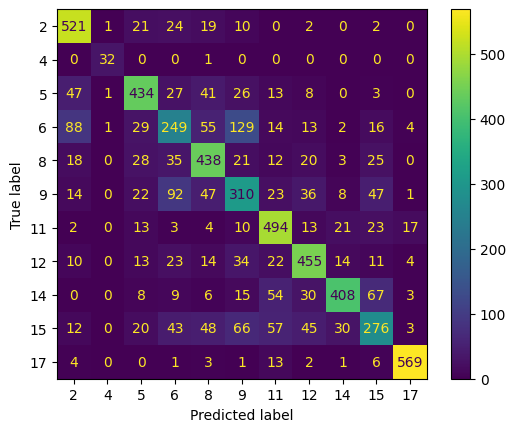

In [18]:
y_ae_gc_test_pred = ae_gc_classifier.evaluate()
ConfusionMatrixDisplay.from_estimator(ae_gc_classifier._classifier, ae_gc_classifier._X_test, ae_gc_classifier._y_test)

In [19]:
ae_gc_pred_roi_da = ae_gc_classifier.classify_roi(ae_embeddings_2024_da)
ae_gc_pred_roi_da

2025-09-19 13:57:36.841 | INFO     | classifiers.pixel_classifier:classify_roi:158 - Classifying entire ROI


<xarray.DataArray 'predicted_class' (y: 835, x: 774)> Size: 5MB
array([[14, 14, 12, ..., 14, 14, 14],
       [14, 12, 12, ..., 14, 14, 14],
       [12, 12, 12, ..., 14, 14, 14],
       ...,
       [14, 14, 15, ..., 14, 14, 14],
       [14, 14, 15, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], shape=(835, 774))
Coordinates:
  * y        (y) float64 7kB 5.784e+06 5.784e+06 ... 5.793e+06 5.793e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.081e+05 3.082e+05

### GeoTessera

In [20]:
%time
gt_gc_classifier = PixelClassifier()
X, y, coords, labels_da = gt_gc_classifier.prepare_data(gc_lcz_da, gt_embeddings_2024_da, "LCZ_PRIMARY", 2000)
gt_gc_classifier._classifier = rf_classifier
gt_gc_classifier.train()

2025-09-19 13:59:10.557 | INFO     | classifiers.pixel_classifier:prepare_data:103 - Preparing data for band LCZ_PRIMARY
2025-09-19 13:59:10.638 | INFO     | classifiers.pixel_classifier:_sample_classes:26 - Sampling classes for band LCZ_PRIMARY
2025-09-19 13:59:10.715 | INFO     | classifiers.pixel_classifier:_extract_embeddings:55 - Extracting embeddings for 20100 coordinates


CPU times: user 1 Œºs, sys: 11 Œºs, total: 12 Œºs
Wall time: 23.8 Œºs


2025-09-19 13:59:48.400 | INFO     | classifiers.pixel_classifier:train:141 - ‚úÖ Model training complete.


RandomForestClassifier(random_state=411)

2025-09-19 13:59:48.445 | INFO     | classifiers.pixel_classifier:evaluate:149 - 
--- üìä Classification Report ---


              precision    recall  f1-score   support

           2       0.49      0.61      0.55       600
           4       0.78      0.23      0.36        30
           5       0.44      0.27      0.33       600
           6       0.28      0.30      0.29       600
           8       0.49      0.50      0.49       600
           9       0.31      0.39      0.34       600
          11       0.49      0.64      0.55       600
          12       0.43      0.41      0.42       600
          14       0.69      0.66      0.68       600
          15       0.44      0.33      0.38       600
          17       0.87      0.76      0.81       600

    accuracy                           0.48      6030
   macro avg       0.52      0.46      0.47      6030
weighted avg       0.49      0.48      0.48      6030



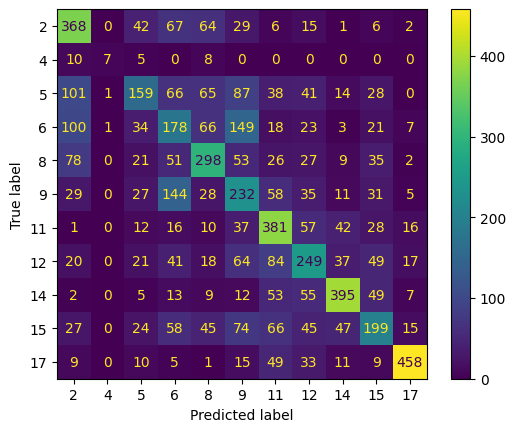

In [21]:
y_gt_gc_test_pred = gt_gc_classifier.evaluate()
ConfusionMatrixDisplay.from_estimator(gt_gc_classifier._classifier, gt_gc_classifier._X_test, gt_gc_classifier._y_test)

In [22]:
gt_gc_pred_roi_da = gt_gc_classifier.classify_roi(gt_embeddings_2024_da)
gt_gc_pred_roi_da

2025-09-19 13:59:48.981 | INFO     | classifiers.pixel_classifier:classify_roi:158 - Classifying entire ROI


<xarray.DataArray 'predicted_class' (y: 836, x: 775)> Size: 5MB
array([[14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 12, 12],
       ...,
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14],
       [14, 14, 14, ..., 14, 14, 14]], shape=(836, 775))
Coordinates:
  * y        (y) float64 7kB 5.793e+06 5.793e+06 ... 5.784e+06 5.784e+06
  * x        (x) float64 6kB 3.004e+05 3.004e+05 ... 3.082e+05 3.082e+05

Detected original LCZ data. Using custom LCZ colormap. üó∫Ô∏è


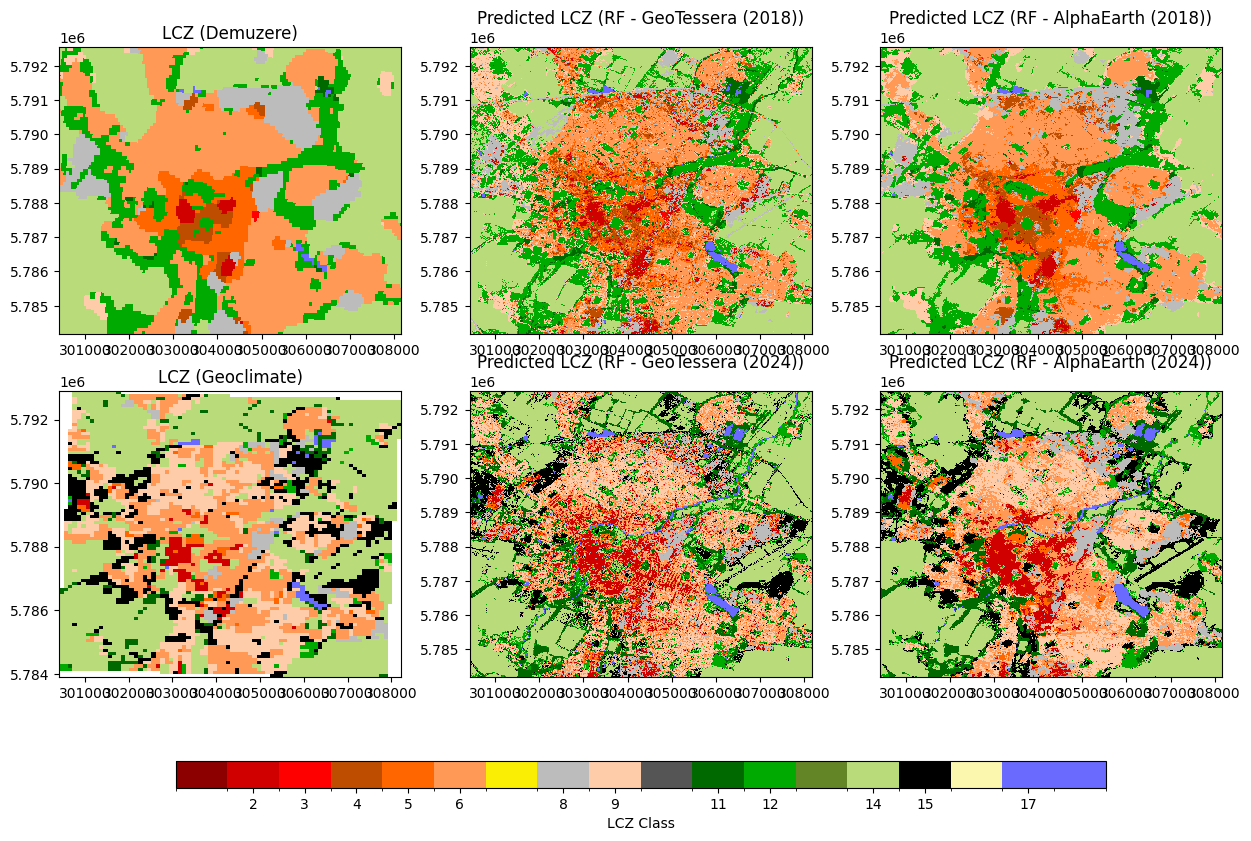

In [23]:
# 1. Get all unique values from the data.
# raw_unique_values = np.unique(np.concatenate([
#     labels_da.sel(band='LCZ_Filter').values.ravel(),
#     gt_pred_roi_da.values.ravel()
# ]))
raw_unique_values = np.unique(np.concatenate([
    dz_lcz_da.sel(band='LCZ_Filter').values.ravel(),
    gt_dz_pred_roi_da.values.ravel(),
    ae_dz_pred_roi_da.values.ravel(),
    gc_lcz_da.sel(band='LCZ_PRIMARY').values.ravel(),
    gt_gc_pred_roi_da.values.ravel(),
    ae_gc_pred_roi_da.values.ravel()
]))
# 2. Create a clean array for logic and ticks by filtering out NaN.
colorbar_ticks = raw_unique_values[~np.isnan(raw_unique_values)]

# 3. Handle the edge case where there is no valid data to plot.
if len(colorbar_ticks) == 0:
    print("‚ö†Ô∏è Warning: Data contains only NaN values. Cannot generate plot with colorbar.")
    # Draw blank plots as a fallback
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].set_title("LCZ (Demuzere, 2022)\n(No data)")
    axes[1].set_title("Predicted LCZ (RF - GeoTessera)\n(No data)")
    plt.show()

else:
    # 4. Use the clean ticks to decide on the colormap.
    if colorbar_ticks.max() <= 2:
        print("Detected reclassified data. Using 'viridis' colormap. üé®")
        num_classes = len(colorbar_ticks)
        cmap = plt.get_cmap('viridis', num_classes)
        boundaries = np.append(colorbar_ticks - 0.5, colorbar_ticks[-1] + 0.5)
        norm = mcolors.BoundaryNorm(boundaries, cmap.N)
    else:
        print("Detected original LCZ data. Using custom LCZ colormap. üó∫Ô∏è")
        lcz_colors = [x['color'] for x in lcz_dict.values()]
        lcz_keys = list(lcz_dict.keys())
        cmap = ListedColormap(lcz_colors)
        boundaries = np.arange(min(lcz_keys) - 0.5, max(lcz_keys) + 1.6, 1)
        norm = mcolors.BoundaryNorm(boundaries, cmap.N+1)

    # 5. IMPORTANT: Tell the colormap how to render NaN values from the data.
    cmap.set_bad(color='white', alpha=0) # Make bad values (like NaN) fully transparent

    # --- Plotting ---
    fig, axes = plt.subplots(2, 3, figsize=(15, 12))

    im0 = dz_lcz_da.sel(band='LCZ_Filter').plot(ax=axes[0][0], add_colorbar=False, cmap=cmap, norm=norm)
    axes[0][0].set_title("LCZ (Demuzere)")

    im1 = gt_dz_pred_roi_da.plot(ax=axes[0][1], add_colorbar=False, cmap=cmap, norm=norm)
    axes[0][1].set_title("Predicted LCZ (RF - GeoTessera (2018))")
    im2 = ae_dz_pred_roi_da.plot(ax=axes[0][2], add_colorbar=False, cmap=cmap, norm=norm)
    axes[0][2].set_title("Predicted LCZ (RF - AlphaEarth (2018))")

    im3 = gc_lcz_da.sel(band='LCZ_PRIMARY').plot(ax=axes[1][0], add_colorbar=False, cmap=cmap, norm=norm)
    axes[1][0].set_title("LCZ (Geoclimate)")

    im4 = gt_gc_pred_roi_da.plot(ax=axes[1][1], add_colorbar=False, cmap=cmap, norm=norm)
    axes[1][1].set_title("Predicted LCZ (RF - GeoTessera (2024))")

    im5 = ae_gc_pred_roi_da.plot(ax=axes[1][2], add_colorbar=False, cmap=cmap, norm=norm)
    axes[1][2].set_title("Predicted LCZ (RF - AlphaEarth (2024))")

    # --- Layout and Colorbar ---
    axes[0][0].set_xlabel('')
    axes[0][0].set_ylabel('')
    axes[0][1].set_xlabel('')
    axes[0][1].set_ylabel('')
    axes[0][2].set_xlabel('')
    axes[0][2].set_ylabel('')
    axes[1][0].set_xlabel('')
    axes[1][0].set_ylabel('')
    axes[1][1].set_xlabel('')
    axes[1][1].set_ylabel('')
    axes[1][2].set_xlabel('')
    axes[1][2].set_ylabel('')
    fig.subplots_adjust(bottom=0.2, top=0.9)

    cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), orientation='horizontal',
                        ticks=colorbar_ticks, shrink=0.8, aspect=35, pad=0.1)
    cbar.set_label('LCZ Class')

    plt.show()


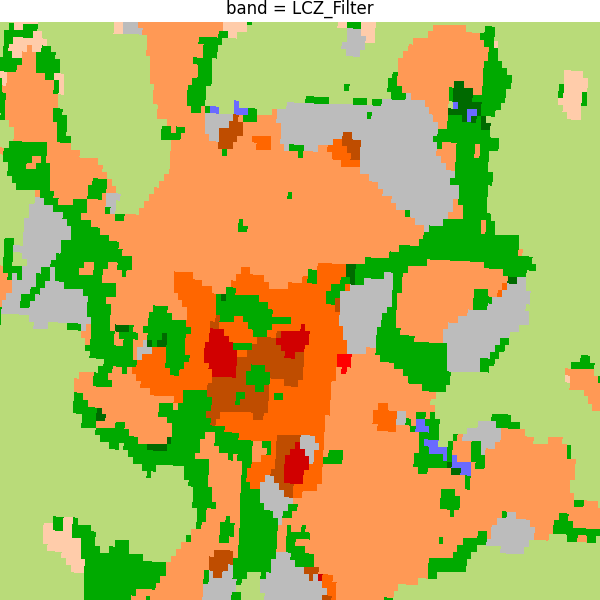
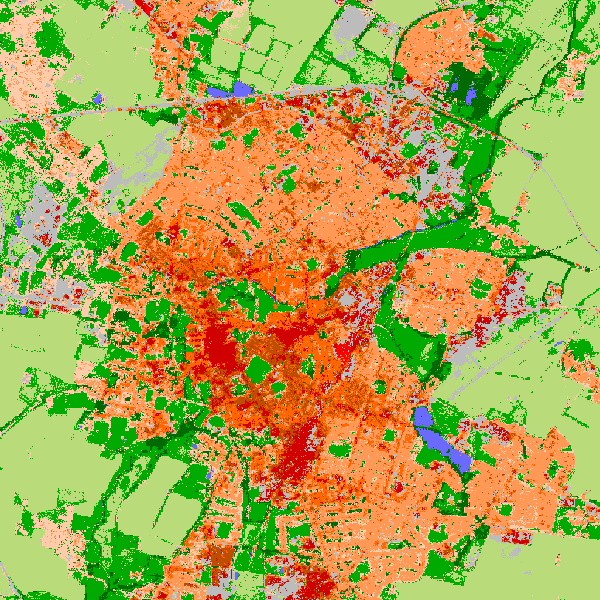
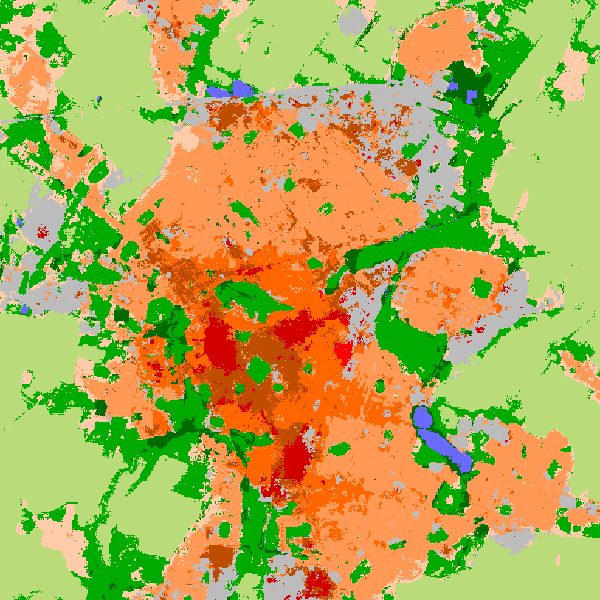
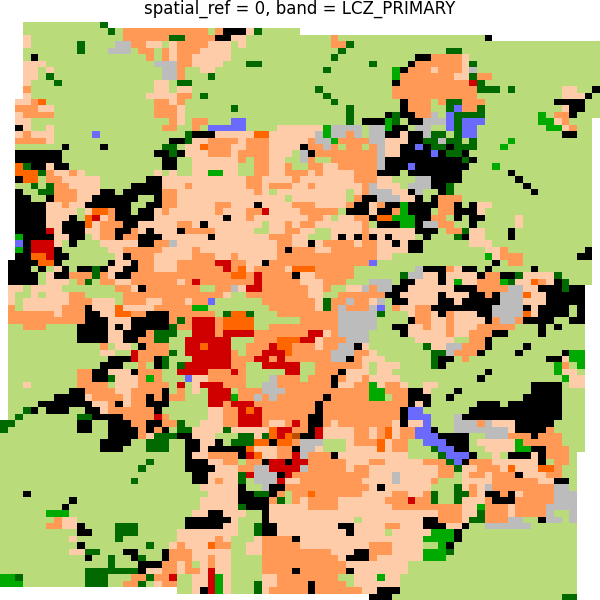
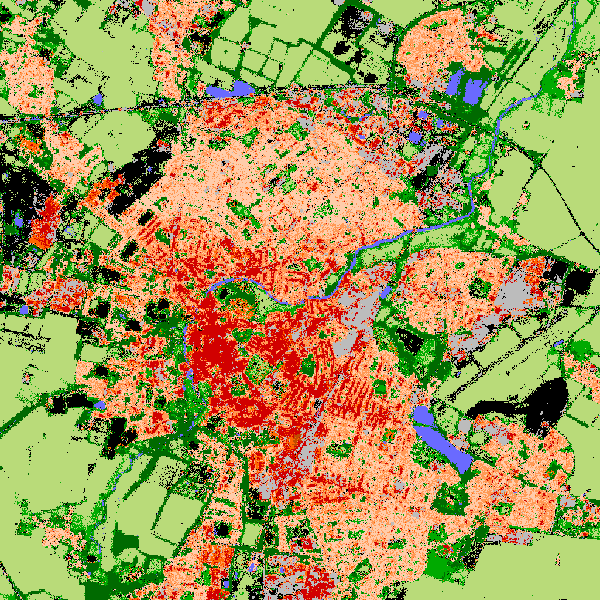
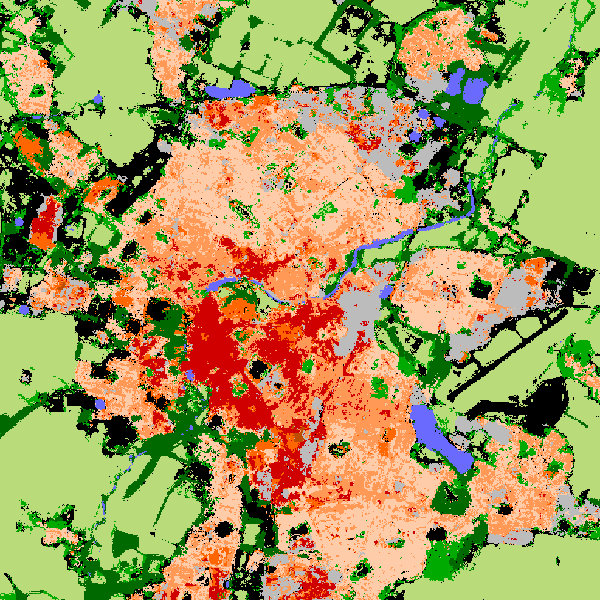

In [24]:
import folium
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tempfile
import os
from folium.raster_layers import ImageOverlay
from folium.plugins import DualMap

def add_overlay_to_map(fmap, da, ax_title, cmap, norm, bounds, opacity=0.6):
    """
    Plots a DataArray as an image overlay on a folium map.
    """
    # Plot to a temporary PNG file
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
        fig, ax = plt.subplots(figsize=(6, 6))
        # Remove axis
        ax.axis('off')
        # Plot the data
        im = da.plot.imshow(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)
        plt.tight_layout(pad=0)
        plt.savefig(tmpfile.name, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close(fig)
        img_path = tmpfile.name

    # Overlay on folium
    img_overlay = folium.raster_layers.ImageOverlay(
        name=ax_title,
        image=img_path,
        bounds=bounds,
        opacity=opacity,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )
    img_overlay.add_to(fmap)

    # Remove the temp file after folium loads it
    os.remove(img_path)

# --- Get bounds for folium (in lat/lon) ---
# We'll use the city.bbox for the Cambridge example
# bbox = [min_lon, min_lat, max_lon, max_lat]
bbox = city_example.bbox  # [min_lon, min_lat, max_lon, max_lat]
bounds = [[bbox[1], bbox[0]], [bbox[3], bbox[2]]]  # [[south, west], [north, east]]

# Center for the map
center = [(bbox[1] + bbox[3]) / 2, (bbox[0] + bbox[2]) / 2]

# --- Prepare the six DataArrays to overlay ---
# Each should be 2D (y, x) and correspond to the correct region
# 1. Demuzere LCZ
dz_lcz_img = dz_lcz_da.sel(band='LCZ_Filter')
# 2. Predicted LCZ (RF - GeoTessera)
gt_dz_pred_img = gt_dz_pred_roi_da
# 3. Predicted LCZ (RF - AlphaEarth)
ae_dz_pred_img = ae_dz_pred_roi_da
# 4. Geoclimate LCZ
gc_lcz_img = gc_lcz_da.sel(band='LCZ_PRIMARY')
# 5. Predicted LCZ (RF - GeoTessera, Geoclimate)
gt_gc_pred_img = gt_gc_pred_roi_da
# 6. Predicted LCZ (RF - AlphaEarth, Geoclimate)
ae_gc_pred_img = ae_gc_pred_roi_da

# --- Create a folium map ---
fmap = folium.Map(location=center, zoom_start=13, tiles='cartodbpositron')

# --- Overlay each plot ---
add_overlay_to_map(fmap, dz_lcz_img, "LCZ (Demuzere)", cmap, norm, bounds)
add_overlay_to_map(fmap, gt_dz_pred_img, "Predicted LCZ (RF - GeoTessera, Demuzere)", cmap, norm, bounds)
add_overlay_to_map(fmap, ae_dz_pred_img, "Predicted LCZ (RF - AlphaEarth, Demuzere)", cmap, norm, bounds)
add_overlay_to_map(fmap, gc_lcz_img, "LCZ (Geoclimate)", cmap, norm, bounds)
add_overlay_to_map(fmap, gt_gc_pred_img, "Predicted LCZ (RF - GeoTessera, Geoclimate)", cmap, norm, bounds)
add_overlay_to_map(fmap, ae_gc_pred_img, "Predicted LCZ (RF - AlphaEarth, Geoclimate)", cmap, norm, bounds)

# Add layer control
folium.LayerControl().add_to(fmap)

# Display the map in the notebook
fmap
